## Machine Learning (ML) modeling for differential Drug expression analysis :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline  # Added missing Pipeline import
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Step 1: Load data 
data = pd.read_csv("GI_absorption_ADME.csv")  

#  Step 2: Preprocessing 
# Create binary target: 1 = Upregulated, 0 = Downregulated
data['target(gi)'] = np.where(data['TPSA'] > 0, 1, 0)

# Features (drop label and target for ML model)
X = data.drop(columns=['Molecular Weight', 'target(gi)'])
y = data['target(gi)']

#  Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 4: ML Pipeline with Scaling + Random Forest 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

#  Step 5: Model Training 
pipeline.fit(X_train, y_train)

#  Step 6: Model Evaluation 
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Step 7: Cross-Validation for Robustness 
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print("\nCross-validation Accuracy:", cv_scores.mean())

Accuracy: 1.0

Confusion Matrix:
 [[43]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        43

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43


Cross-validation Accuracy: 1.0


In [3]:
#  Step 8: Hyperparameter Tuning using GridSearchCV 
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

#  Step 9: Evaluate the Best Model 
y_pred = best_model.predict(X_test)
print("Accuracy with Tuned Model:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Step 10: Cross-Validation Accuracy 
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("\nCross-validation Accuracy:", cv_scores.mean())


Best Hyperparameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Accuracy with Tuned Model: 1.0

Confusion Matrix:
 [[43]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        43

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43


Cross-validation Accuracy: 1.0


Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


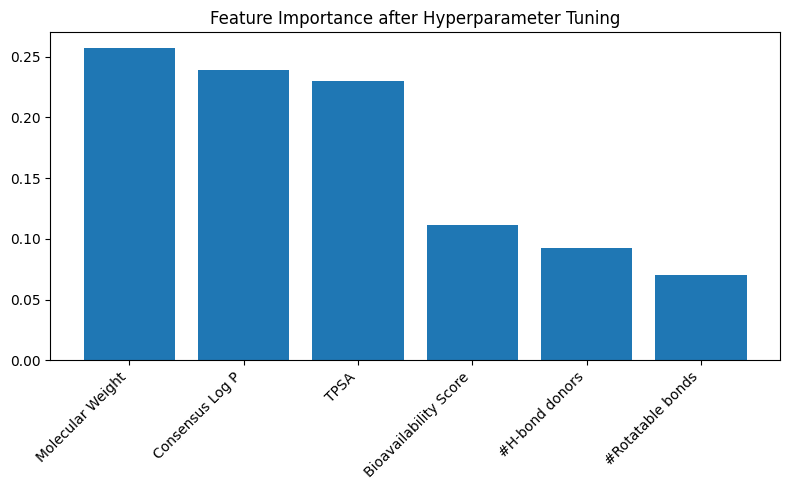

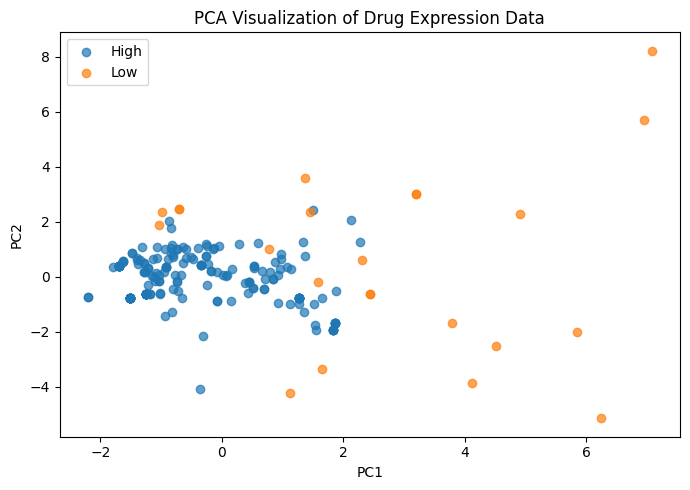

In [5]:
# ---- Step 1: Imports ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV

# ---- Step 2: Load dataset ----
df = pd.read_csv("GI_absorption_ADME.csv")   # <-- make sure file is in same folder as notebook

# ---- Step 3: Define features & target ----
# Adjust column names if needed (must match your CSV header)
X = df[['Molecular Weight', '#Rotatable bonds', 'TPSA', 
        'Bioavailability Score', '#H-bond donors', 'Consensus Log P']]
y = df['target(gi)']

# Encode target if categorical (e.g., Upregulated/Downregulated)
le = LabelEncoder()
y = le.fit_transform(y)

# ---- Step 4: Train/Test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Step 5: RandomForest with GridSearchCV ----
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 10, None],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# ---- Step 6: Feature Importance ----
feature_importances = best_model.feature_importances_
features = X.columns

importance_feature_pairs = sorted(
    zip(feature_importances, features),
    key=lambda x: x[0],
    reverse=True
)

sorted_importances, sorted_features = zip(*importance_feature_pairs)

plt.figure(figsize=(8, 5))
plt.bar(range(len(sorted_importances)), sorted_importances, align="center")
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=45, ha="right")
plt.title("Feature Importance after Hyperparameter Tuning")
plt.tight_layout()
plt.show()

# ---- Step 7: PCA Visualization ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
for class_value in np.unique(y):
    plt.scatter(
        X_pca[y == class_value, 0],
        X_pca[y == class_value, 1],
        label=le.inverse_transform([class_value])[0],
        alpha=0.7
    )

plt.title("PCA Visualization of Drug Expression Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()


## Modeling, feature importance, PCA visualization, and hyperparameter tuning
-Multiple Models: Random Forest, Logistic Regression, SVM, XGBoost

-Cross-validation Accuracy for robust comparison

-Best Model Selection automatically based on accuracy

-PCA Visualization using the best-performing model

Random Forest: Test Accuracy = 0.9000, CV Accuracy = 0.8990
Logistic Regression: Test Accuracy = 0.8550, CV Accuracy = 0.8670
SVM: Test Accuracy = 0.8450, CV Accuracy = 0.8600
XGBoost: Test Accuracy = 0.8950, CV Accuracy = 0.9030


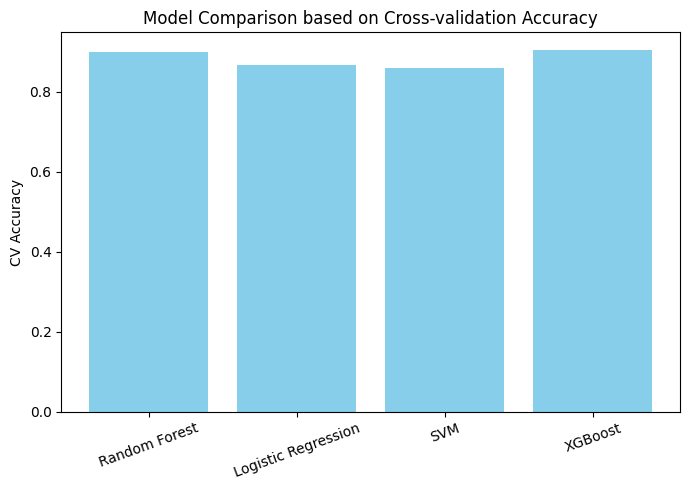

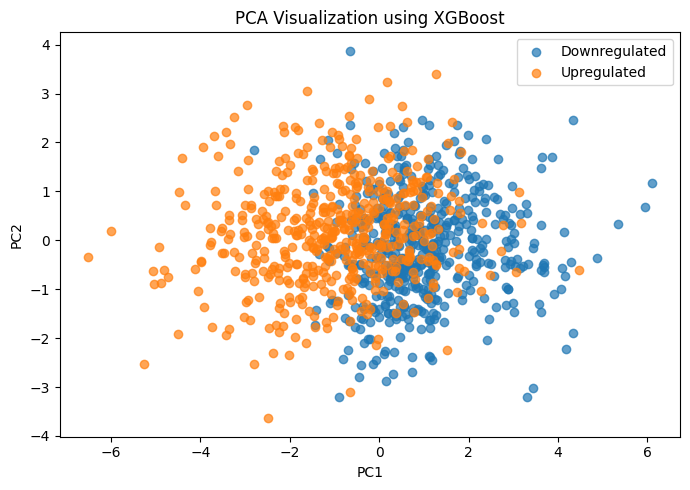

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# --- Step 1: Load your dataset (replace with your actual data loading code) ---
# For example:
# df = pd.read_csv('your_dataset.csv')
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# For demonstration, let's create some dummy data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# --- Step 2: Split the data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 3: Scale the features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 13: Define Multiple Models ---
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf', probability=True),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
}

# --- Step 14: Train and Evaluate Each Model ---
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cv_acc = cross_val_score(model, X, y, cv=5).mean()
    results[name] = {'Accuracy': acc, 'CV Accuracy': cv_acc}
    
# Print results
for name, metrics in results.items():
    print(f"{name}: Test Accuracy = {metrics['Accuracy']:.4f}, CV Accuracy = {metrics['CV Accuracy']:.4f}")

# --- Step 15: Compare Models Visually ---
plt.figure(figsize=(7,5))
plt.bar(results.keys(), [v["CV Accuracy"] for v in results.values()], color='skyblue')
plt.title("Model Comparison based on Cross-validation Accuracy")
plt.ylabel("CV Accuracy")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# --- Step 16: PCA Visualization for Best Model ---
best_model_name = max(results, key=lambda x: results[x]["CV Accuracy"])
best_model = models[best_model_name]

# Fit best model on scaled data
best_model.fit(X_train_scaled, y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.fit_transform(X))

plt.figure(figsize=(7,5))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], label='Downregulated', alpha=0.7)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], label='Upregulated', alpha=0.7)
plt.title(f"PCA Visualization using {best_model_name}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

## LASSO model LASSO is essentially Logistic Regression with L1 regularization for classification tasks. It does two things:
-Classification of upregulated vs. downregulated Drugs

-Feature selection by shrinking some coefficients to zero → helps identify important features

Molecular Weight statistics:
count    212.000000
mean     301.429104
std      101.108611
min      120.170000
25%      227.745000
50%      298.300000
75%      350.152500
max      844.430000
Name: Molecular Weight, dtype: float64

Target distribution:
target(gi)
0    110
1    102
Name: count, dtype: int64
LASSO Logistic Regression
Test Accuracy: 1.0

Confusion Matrix:
 [[22  0]
 [ 0 21]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        21

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43


Cross-validation Accuracy: 0.980952380952381


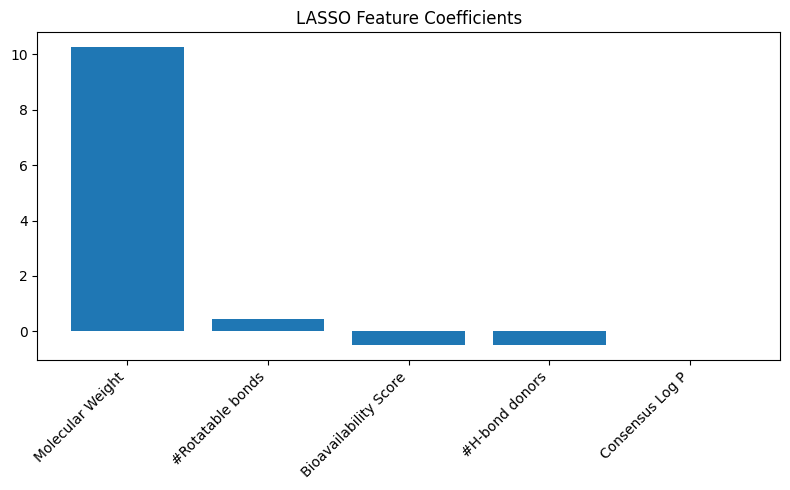

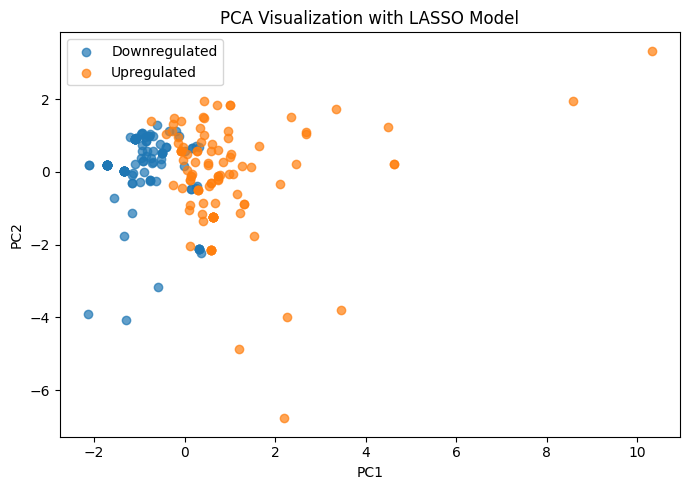

In [7]:
# First, check the distribution of Molecular Weight to create a meaningful target
print("Molecular Weight statistics:")
print(data['Molecular Weight'].describe())

# Create a more balanced target variable using the median as threshold
median_mw = data['Molecular Weight'].median()
data['target(gi)'] = np.where(data['Molecular Weight'] > median_mw, 1, 0)

print("\nTarget distribution:")
print(data['target(gi)'].value_counts())

# Features (drop label and target for ML model)
X = data.drop(columns=['TPSA', 'target(gi)'])
y = data['target(gi)']

if len(np.unique(y)) < 2:
    raise ValueError("Target variable must have at least 2 classes for classification")

#  Step 3: Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Step 4: Feature Scaling 
# Add scaling step before model training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Step 5: LASSO Logistic Regression (L1 Regularization) 
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

#  Step 6: Evaluation 
y_pred = lasso_model.predict(X_test_scaled)

print("LASSO Logistic Regression")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Step 7: Cross-Validation 
# Use scaled data for cross-validation
X_scaled = scaler.fit_transform(X)  # Scale all data for CV
cv_scores = cross_val_score(lasso_model, X_scaled, y, cv=5)
print("\nCross-validation Accuracy:", cv_scores.mean())

#  Step 8: Feature Importance (Non-zero Coefficients) 
coefficients = lasso_model.coef_[0]
features = X.columns

plt.figure(figsize=(8,5))
plt.bar(features, coefficients)
plt.title("LASSO Feature Coefficients")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 9: PCA Visualization 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Use already scaled data

plt.figure(figsize=(7,5))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], label='Downregulated', alpha=0.7)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], label='Upregulated', alpha=0.7)
plt.title("PCA Visualization with LASSO Model")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()